In [1]:
import gdown
import polars as pl
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
drive_loc = 'https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ'

download_LC = 'lightcast_jobs_postings.csv'
gdown.download(drive_loc, download_LC, quiet=False)

Jobs = pl.read_csv(download_LC)

Downloading...
From (original): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ
From (redirected): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ&confirm=t&uuid=805388e9-d119-4aaf-874b-e0318251376a
To: C:\Users\jtsto\OneDrive\Documents\03 BU SPRING 2025\AD 688\Project_03_working_files\lightcast_jobs_postings.csv
100%|██████████| 717M/717M [01:06<00:00, 10.8MB/s] 


In [20]:
print(Jobs.columns)
Jobs.select(Jobs.columns).head(3)

['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,ACTIVE_URLS,ACTIVE_SOURCES_INFO,TITLE_RAW,BODY,MODELED_EXPIRED,MODELED_DURATION,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,MAX_EDULEVELS,MAX_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,IS_INTERNSHIP,SALARY,REMOTE_TYPE,REMOTE_TYPE_NAME,ORIGINAL_PAY_PERIOD,SALARY_TO,SALARY_FROM,…,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,SOC_2,SOC_2_NAME,SOC_3,SOC_3_NAME,SOC_4,SOC_4_NAME,SOC_5,SOC_5_NAME,LIGHTCAST_SECTORS,LIGHTCAST_SECTORS_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
str,str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,i64,i64,str,str,bool,str,str,i64,str,i64,str,i64,str,i64,i64,bool,i64,i64,str,str,i64,i64,…,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str
"""1f57d95acf4dc67ed2819eb12f049f…","""9/6/2024""","""2024-09-06 20:32:57.352 Z""",0,"""6/2/2024""","""6/8/2024""",6,"""[ ""Company"" ]""","""[ ""brassring.com"" ]""","""[ ""https://sjobs.brassring.c…","""[]""",null,"""Enterprise Analyst (II-III)""","""31-May-2024 Enterprise Analys…","""6/8/2024""",6,894731,"""Murphy USA""","""Murphy USA""",false,"""[ 2 ]""","""[ ""Bachelor's degree"" ]""",2,"""Bachelor's degree""",null,null,1,"""Full-time (> 32 hours)""",2,2,false,null,0,"""[None]""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101011,"""General ERP Analyst / Consulta…",2310,"""Business Intelligence""",23101011,"""General ERP Analyst / Consulta…",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""","""[ 7 ]""","""[ ""Artificial Intelligence"" …",44,"""Retail Trade""",441,"""Motor Vehicle and Parts Dealer…",4413,"""Automotive Parts, Accessories,…",44133,"""Automotive Parts and Accessori…",441330,"""Automotive Parts and Accessori…"
"""0cb072af26757b6c4ea9464472a50a…","""8/2/2024""","""2024-08-02 17:08:58.838 Z""",0,"""6/2/2024""","""8/1/2024""",null,"""[ ""Job Board"" ]""","""[ ""maine.gov"" ]""","""[ ""https://joblink.maine.gov…","""[]""",null,"""Oracle Consultant - Reports (3…","""Oracle Consultant - Reports (3…","""8/1/2024""",null,133098,"""Smx Corporation Limited""","""SMX""",true,"""[ 99 ]""","""[ ""No Education Listed"" ]""",99,"""No Education Listed""",null,null,1,"""Full-time (> 32 hours)""",3,3,false,null,1,"""Remote""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101012,"""Oracle Consultant / Analyst""",2310,"""Business Intelligence""",23101012,"""Oracle Consultant / Analyst""",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""",null,null,56,"""Administrative and Support and…",561,"""Administrative and Support Ser…",5613,"""Employment Services""",56132,"""Temporary Help Services""",561320,"""Temporary Help Services"""
"""85318b12b3331fa490d32ad014379d…","""9

In [21]:
columns_to_check = [
    'SKILLS_NAME',
    'SPECIALIZED_SKILLS_NAME',
    'CERTIFICATIONS_NAME',
    'COMMON_SKILLS_NAME',
    'SOFTWARE_SKILLS_NAME'
]

for col in columns_to_check:
    unique_count = Jobs.select(pl.col(col).n_unique()).item()
    print(f"{col}: {unique_count} unique values")

SKILLS_NAME: 44173 unique values
SPECIALIZED_SKILLS_NAME: 41462 unique values
CERTIFICATIONS_NAME: 1590 unique values
COMMON_SKILLS_NAME: 29574 unique values
SOFTWARE_SKILLS_NAME: 22456 unique values


In [22]:
Jobs_cleaned = Jobs.with_columns([
    pl.when((pl.col(col) == '') | (pl.col(col) == '[]'))
      .then(None)
      .otherwise(pl.col(col))
      .alias(col)
    for col in columns_to_check
])

In [23]:
for col in columns_to_check:
    missing_count = Jobs_cleaned.filter(
        pl.col(col).is_null()
    ).height
    print(f"{col}: {missing_count} missing values")

SKILLS_NAME: 567 missing values
SPECIALIZED_SKILLS_NAME: 936 missing values
CERTIFICATIONS_NAME: 59117 missing values
COMMON_SKILLS_NAME: 5928 missing values
SOFTWARE_SKILLS_NAME: 9515 missing values


In [24]:
for col in columns_to_check:
    print(f"\nTop 5 for {col}:")
    top_5 = (
        Jobs_cleaned.group_by(col)
            .agg(pl.len().alias('count'))
            .sort('count', descending=True)
            .select([col, 'count'])
            .head(5)
    )
    print(top_5)


Top 5 for SKILLS_NAME:
shape: (5, 2)
┌───────────────────────────────┬───────┐
│ SKILLS_NAME                   ┆ count │
│ ---                           ┆ ---   │
│ str                           ┆ u32   │
╞═══════════════════════════════╪═══════╡
│ null                          ┆ 567   │
│ [                             ┆ 376   │
│   "User Experience (UX) Desi… ┆       │
│ [                             ┆ 279   │
│   "Cloud Computing",          ┆       │
│   "Ente…                      ┆       │
│ [                             ┆ 270   │
│   "Pivot Tables And Charts",… ┆       │
│ [                             ┆ 152   │
│   "Data Analysis"             ┆       │
│ ]                             ┆       │
└───────────────────────────────┴───────┘

Top 5 for SPECIALIZED_SKILLS_NAME:
shape: (5, 2)
┌───────────────────────────────┬───────┐
│ SPECIALIZED_SKILLS_NAME       ┆ count │
│ ---                           ┆ ---   │
│ str                           ┆ u32   │
╞═════════════════════════════

In [25]:
plots = {}

for col in columns_to_check:
    top_6 = (
        Jobs_cleaned.group_by(col)
            .agg(pl.len().alias('count'))
            .sort('count', descending=True)
            .select([col, 'count'])
            .head(6)
    )

    top_5_excl_null = top_6.slice(1, 5)
    print(top_5_excl_null)
    
    fig = px.bar(
        top_5_excl_null.to_pandas(),
        x=col,
        y="count",
        color=col,
        title=f"Top 5 Most Common (excluding null): {col}",
        labels={col: col.replace('_', ' ').title(), "count": "Count"},
    )
    fig.update_layout(
    xaxis_tickangle=-45,
    width=1200,
    margin=dict(b=150),
    showlegend=False 
    )

    plots[col] = fig

shape: (5, 2)
┌───────────────────────────────┬───────┐
│ SKILLS_NAME                   ┆ count │
│ ---                           ┆ ---   │
│ str                           ┆ u32   │
╞═══════════════════════════════╪═══════╡
│ [                             ┆ 376   │
│   "User Experience (UX) Desi… ┆       │
│ [                             ┆ 279   │
│   "Cloud Computing",          ┆       │
│   "Ente…                      ┆       │
│ [                             ┆ 270   │
│   "Pivot Tables And Charts",… ┆       │
│ [                             ┆ 152   │
│   "Data Analysis"             ┆       │
│ ]                             ┆       │
│ [                             ┆ 112   │
│   "Management",               ┆       │
│   "Microsoft…                 ┆       │
└───────────────────────────────┴───────┘
shape: (5, 2)
┌───────────────────────────────┬───────┐
│ SPECIALIZED_SKILLS_NAME       ┆ count │
│ ---                           ┆ ---   │
│ str                           ┆ u32   │
╞═════

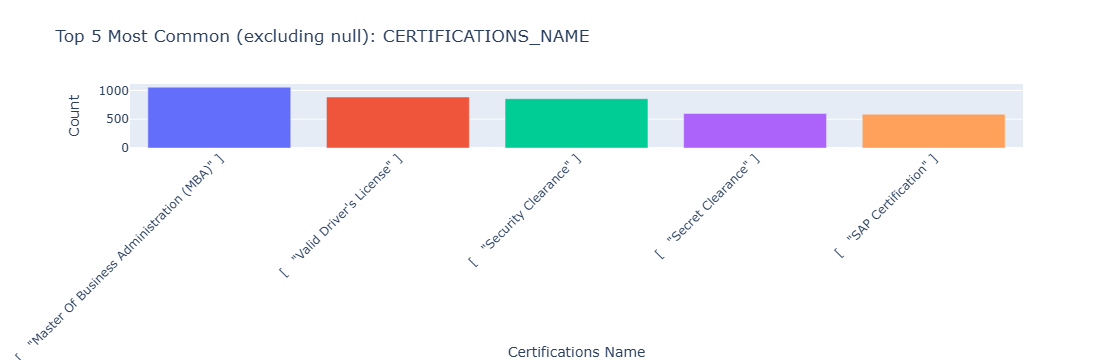

In [26]:
plots['CERTIFICATIONS_NAME'].show()

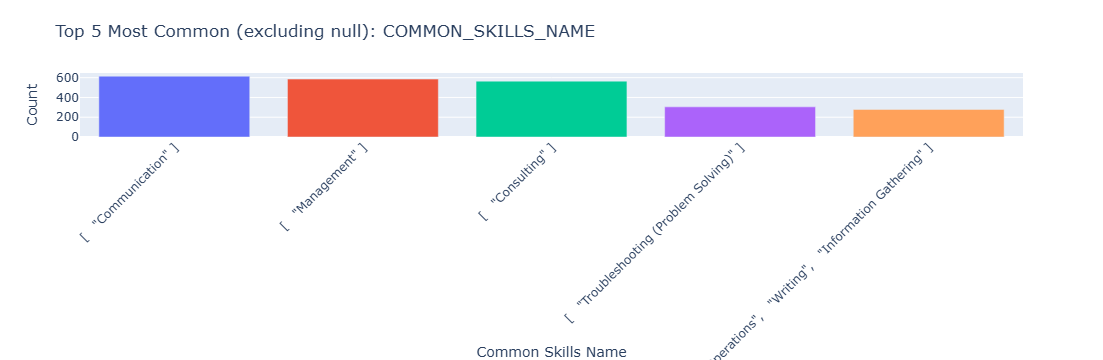

In [27]:
plots['COMMON_SKILLS_NAME'].show()

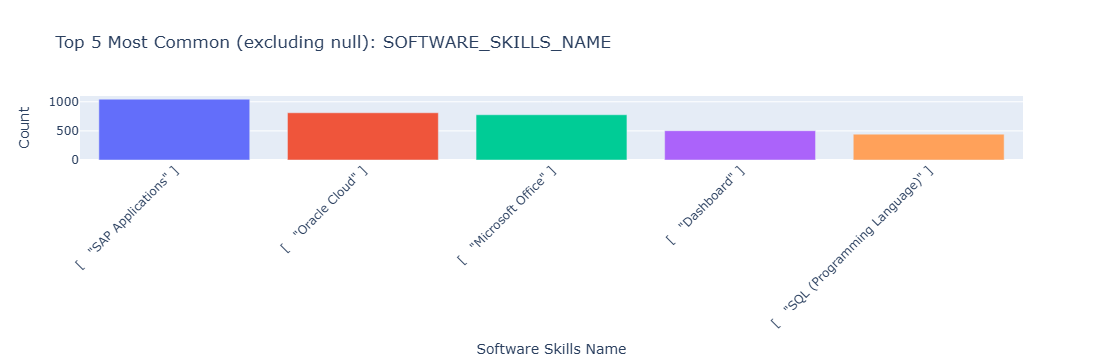

In [28]:
plots['SOFTWARE_SKILLS_NAME'].show()

In [29]:
skills_full = (
    Jobs_cleaned
    .filter(pl.col('SKILLS_NAME').is_not_null() & (pl.col('SKILLS_NAME') != '[]') & (pl.col('SKILLS_NAME') != ''))
    .group_by('SKILLS_NAME')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .select(['SKILLS_NAME', 'count'])
)

skills_full_list = skills_full['SKILLS_NAME'].to_list()

In [30]:
for skill in skills_full_list[:5]:
    print(skill)

[
  "User Experience (UX) Design",
  "Project Management",
  "Cyber Security",
  "Technical Support",
  "Data Analysis"
]
[
  "Cloud Computing",
  "Enterprise Resource Planning",
  "Workflow Management",
  "Gap Analysis",
  "Durable Goods",
  "Agile Methodology",
  "Planning",
  "Business Process Reengineering",
  "OneStream (CPM Software)",
  "Integrated Business Planning",
  "Analytical Skills",
  "Data Engineering",
  "Functional Specification",
  "Finance",
  "Standard Operating Procedure",
  "Systems Development Life Cycle",
  "Data Integration",
  "Information Systems",
  "Test Planning",
  "Supply Chain",
  "User Acceptance Testing (UAT)",
  "SAP Applications",
  "Business Requirements",
  "Organizational Strategy",
  "Operations",
  "Writing",
  "Business To Business",
  "Information Gathering",
  "Technical Documentation",
  "Project Planning",
  "Anaplan",
  "Software As A Service (SaaS)",
  "Software Development",
  "Business Planning",
  "Business Strategies",
  "Computer S